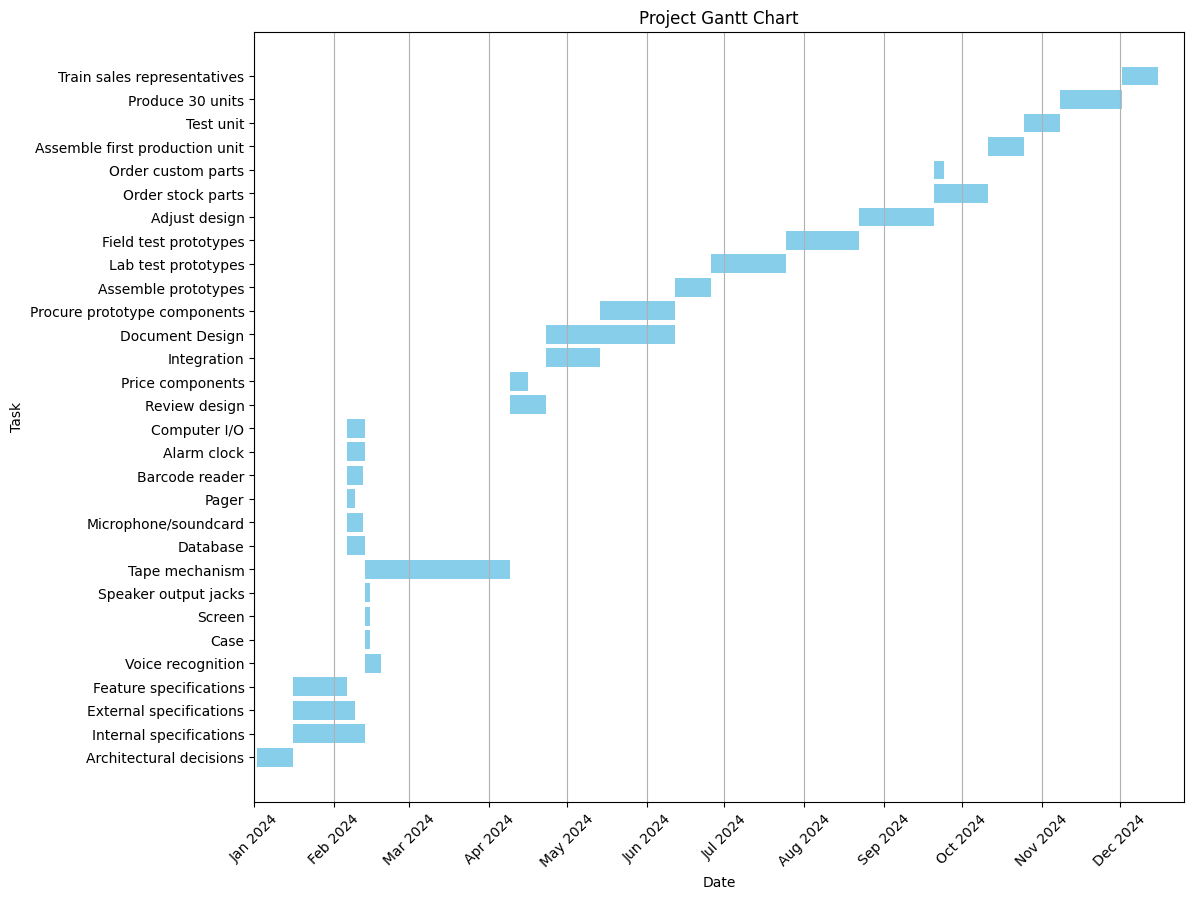

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define the project schedule
tasks = [
    ("Architectural decisions", 10, None),
    ("Internal specifications", 20, "Architectural decisions"),
    ("External specifications", 18, "Architectural decisions"),
    ("Feature specifications", 15, "Architectural decisions"),
    ("Voice recognition", 4, "Internal specifications,External specifications"),
    ("Case", 2, "Internal specifications,External specifications"),
    ("Screen", 2, "Internal specifications,External specifications"),
    ("Speaker output jacks", 2, "Internal specifications,External specifications"),
    ("Tape mechanism", 40, "Internal specifications,External specifications"),
    ("Database", 5, "Feature specifications"),
    ("Microphone/soundcard", 4, "Feature specifications"),
    ("Pager", 3, "Feature specifications"),
    ("Barcode reader", 4, "Feature specifications"),
    ("Alarm clock", 5, "Feature specifications"),
    ("Computer I/O", 5, "Feature specifications"),
    ("Review design", 10, "Voice recognition,Case,Screen,Speaker output jacks,Tape mechanism,Database,Microphone/soundcard,Pager,Barcode reader,Alarm clock,Computer I/O"),
    ("Price components", 5, "Voice recognition,Case,Screen,Speaker output jacks,Tape mechanism,Database,Microphone/soundcard,Pager,Barcode reader,Alarm clock,Computer I/O"),
    ("Integration", 15, "Review design,Price components"),
    ("Document Design", 35, "Review design"),
    ("Procure prototype components", 20, "Integration"),
    ("Assemble prototypes", 10, "Procure prototype components"),
    ("Lab test prototypes", 20, "Assemble prototypes"),
    ("Field test prototypes", 20, "Document Design,Lab test prototypes"),
    ("Adjust design", 20, "Field test prototypes"),
    ("Order stock parts", 15, "Adjust design"),
    ("Order custom parts", 2, "Adjust design"),
    ("Assemble first production unit", 10, "Order stock parts,Order custom parts"),
    ("Test unit", 10, "Assemble first production unit"),
    ("Produce 30 units", 15, "Test unit"),
    ("Train sales representatives", 10, "Produce 30 units")
]

# Define holidays and weekends
holidays = [
    "2024-01-01", "2024-05-27", "2024-07-04",
    "2024-09-02", "2024-11-28", "2024-12-25", "2024-12-26"
]
weekends = [5, 6]  # Saturday and Sunday

# Convert holidays to datetime
holidays = [datetime.strptime(date, "%Y-%m-%d") for date in holidays]

# Function to calculate end date considering working days, holidays, and weekends
def calculate_end_date(start_date, duration):
    end_date = start_date
    while duration > 0:
        end_date += timedelta(days=1)
        if end_date.weekday() not in weekends and end_date not in holidays:
            duration -= 1
    return end_date

# Create the project schedule with start and end dates
schedule = []
start_date = datetime(2024, 1, 2)

for task, duration, predecessors in tasks:
    if predecessors:
        pred_end_dates = [end for tsk, start, end in schedule if tsk in predecessors.split(",")]
        start_date = max(pred_end_dates)
    end_date = calculate_end_date(start_date, duration)
    schedule.append((task, start_date, end_date))
    start_date = end_date + timedelta(days=1)

# Create a DataFrame for the schedule
df = pd.DataFrame(schedule, columns=["Task", "Start", "End"])

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(12, 10))
for idx, row in df.iterrows():
    ax.barh(row["Task"], (row["End"] - row["Start"]).days, left=row["Start"], color='skyblue')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Task")
plt.title("Project Gantt Chart")
plt.grid(axis='x')

# Ensure the x-axis starts in January 2024 and includes the full project span
start_of_project = datetime(2024, 1, 1)
end_of_project = df["End"].max() + timedelta(days=10)
plt.xlim([start_of_project, end_of_project])

plt.show()


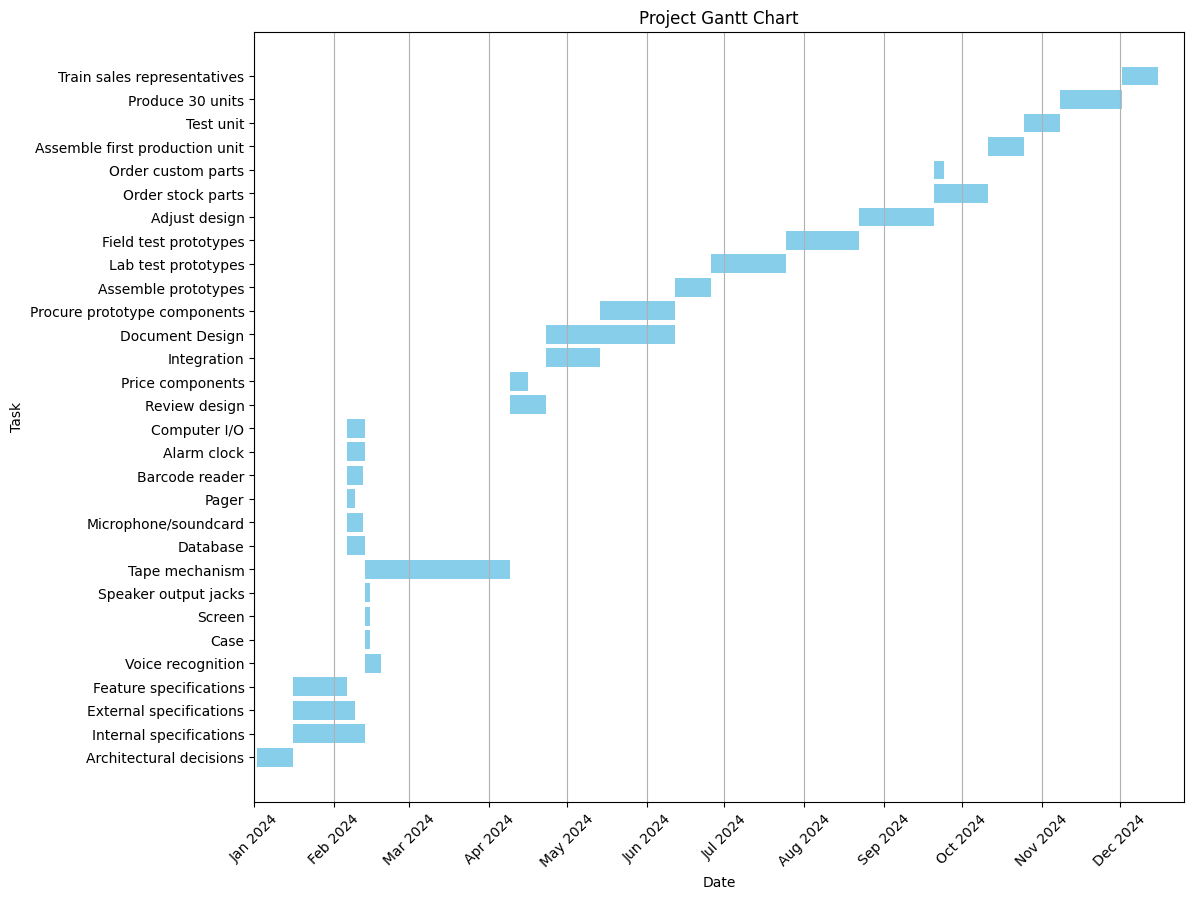

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define the project schedule
tasks = [
    ("Architectural decisions", 10, None),
    ("Internal specifications", 20, "Architectural decisions"),
    ("External specifications", 18, "Architectural decisions"),
    ("Feature specifications", 15, "Architectural decisions"),
    ("Voice recognition", 4, "Internal specifications,External specifications"),
    ("Case", 2, "Internal specifications,External specifications"),
    ("Screen", 2, "Internal specifications,External specifications"),
    ("Speaker output jacks", 2, "Internal specifications,External specifications"),
    ("Tape mechanism", 40, "Internal specifications,External specifications"),
    ("Database", 5, "Feature specifications"),
    ("Microphone/soundcard", 4, "Feature specifications"),
    ("Pager", 3, "Feature specifications"),
    ("Barcode reader", 4, "Feature specifications"),
    ("Alarm clock", 5, "Feature specifications"),
    ("Computer I/O", 5, "Feature specifications"),
    ("Review design", 10, "Voice recognition,Case,Screen,Speaker output jacks,Tape mechanism,Database,Microphone/soundcard,Pager,Barcode reader,Alarm clock,Computer I/O"),
    ("Price components", 5, "Voice recognition,Case,Screen,Speaker output jacks,Tape mechanism,Database,Microphone/soundcard,Pager,Barcode reader,Alarm clock,Computer I/O"),
    ("Integration", 15, "Review design,Price components"),
    ("Document Design", 35, "Review design"),
    ("Procure prototype components", 20, "Integration"),
    ("Assemble prototypes", 10, "Procure prototype components"),
    ("Lab test prototypes", 20, "Assemble prototypes"),
    ("Field test prototypes", 20, "Document Design,Lab test prototypes"),
    ("Adjust design", 20, "Field test prototypes"),
    ("Order stock parts", 15, "Adjust design"),
    ("Order custom parts", 2, "Adjust design"),
    ("Assemble first production unit", 10, "Order stock parts,Order custom parts"),
    ("Test unit", 10, "Assemble first production unit"),
    ("Produce 30 units", 15, "Test unit"),
    ("Train sales representatives", 10, "Produce 30 units")
]

# Define holidays and weekends
holidays = [
    "2024-01-01", "2024-05-27", "2024-07-04",
    "2024-09-02", "2024-11-28", "2024-12-25", "2024-12-26"
]
weekends = [5, 6]  # Saturday and Sunday

# Convert holidays to datetime and adjust if they fall on weekends
def adjust_holiday(date_str):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    if date.weekday() == 5:  # Saturday
        return date - timedelta(days=1)
    elif date.weekday() == 6:  # Sunday
        return date + timedelta(days=1)
    return date

holidays = [adjust_holiday(date) for date in holidays]

# Function to calculate end date considering working days, holidays, and weekends
def calculate_end_date(start_date, duration):
    end_date = start_date
    while duration > 0:
        end_date += timedelta(days=1)
        if end_date.weekday() not in weekends and end_date not in holidays:
            duration -= 1
    return end_date

# Create the project schedule with start and end dates
schedule = []
start_date = datetime(2024, 1, 2)  # Start on the first working day

for task, duration, predecessors in tasks:
    if predecessors:
        pred_end_dates = [end for tsk, start, end in schedule if tsk in predecessors.split(",")]
        start_date = max(pred_end_dates)
    end_date = calculate_end_date(start_date, duration)
    schedule.append((task, start_date, end_date))
    start_date = end_date + timedelta(days=1)

# Create a DataFrame for the schedule
df = pd.DataFrame(schedule, columns=["Task", "Start", "End"])

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(12, 10))
for idx, row in df.iterrows():
    ax.barh(row["Task"], (row["End"] - row["Start"]).days, left=row["Start"], color='skyblue')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Task")
plt.title("Project Gantt Chart")
plt.grid(axis='x')

# Ensure the x-axis starts in January 2024 and includes the full project span
start_of_project = datetime(2024, 1, 1)
end_of_project = df["End"].max() + timedelta(days=10)
plt.xlim([start_of_project, end_of_project])

plt.show()


In [2]:
import matplotlib.pyplot as plt
import network as nx

# Create a directed graph
G = nx.DiGraph()

# Define tasks with durations
tasks = {
    "Architectural decisions": 10,
    "Internal Specifications": 20,
    "External Specifications": 18,
    "Feature specifications": 15,
    "Voice recognition": 15,
    "Case": 4,
    "Screen": 2,
    "Speaker output jacks": 2,
    "Tape mechanism": 40,
    "Database": 5,
    "Microphone/soundcard": 5,
    "Pager": 4,
    "Barcode reader": 3,
    "Alarm clock": 4,
    "Computer I/O": 5,
    "Review design": 10,
    "Price components": 5,
    "Integration": 15,
    "Document Design": 35,
    "Procure prototype components": 20,
    "Assemble prototypes": 10,
    "Lab test prototypes": 20,
    "Field test prototypes": 20,
    "Adjust design": 20,
    "Order stock parts": 15,
    "Order custom parts": 2,
    "Assemble first production unit": 10,
    "Test unit": 10,
    "Produce 30 units": 10,
    "Train sales representatives": 15
}

# Define dependencies
dependencies = [
    ("Architectural decisions", "Internal Specifications"),
    ("Architectural decisions", "External Specifications"),
    ("Architectural decisions", "Feature specifications"),
    ("Internal Specifications", "Voice recognition"),
    ("Internal Specifications", "Case"),
    ("Internal Specifications", "Screen"),
    ("Internal Specifications", "Speaker output jacks"),
    ("External Specifications", "Tape mechanism"),
    ("Feature specifications", "Database"),
    ("Database", "Microphone/soundcard"),
    ("Database", "Pager"),
    ("Database", "Barcode reader"),
    ("Database", "Alarm clock"),
    ("Database", "Computer I/O"),
    ("Review design", "Price components"),
    ("Integration", "Document Design"),
    ("Document Design", "Procure prototype components"),
    ("Procure prototype components", "Assemble prototypes"),
    ("Assemble prototypes", "Lab test prototypes"),
    ("Lab test prototypes", "Field test prototypes"),
    ("Field test prototypes", "Adjust design"),
    ("Adjust design", "Order stock parts"),
    ("Adjust design", "Order custom parts"),
    ("Order stock parts", "Assemble first production unit"),
    ("Assemble first production unit", "Test unit"),
    ("Test unit", "Produce 30 units"),
    ("Produce 30 units", "Train sales representatives")
]

# Add tasks and dependencies to the graph
for task, duration in tasks.items():
    G.add_node(task, duration=duration)

for dependency in dependencies:
    G.add_edge(*dependency)

# Draw the network diagram
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(20, 10))

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
node_labels = {node: f"{node}\n({data['duration']} days)" for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

plt.title("Network Diagram for Project Tasks")
plt.show()


ModuleNotFoundError: No module named 'network'

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define tasks with durations
tasks = {
    "Architectural decisions": 10,
    "Internal Specifications": 20,
    "External Specifications": 18,
    "Feature specifications": 15,
    "Voice recognition": 15,
    "Case": 4,
    "Screen": 2,
    "Speaker output jacks": 2,
    "Tape mechanism": 40,
    "Database": 5,
    "Microphone/soundcard": 5,
    "Pager": 4,
    "Barcode reader": 3,
    "Alarm clock": 4,
    "Computer I/O": 5,
    "Review design": 10,
    "Price components": 5,
    "Integration": 15,
    "Document Design": 35,
    "Procure prototype components": 20,
    "Assemble prototypes": 10,
    "Lab test prototypes": 20,
    "Field test prototypes": 20,
    "Adjust design": 20,
    "Order stock parts": 15,
    "Order custom parts": 2,
    "Assemble first production unit": 10,
    "Test unit": 10,
    "Produce 30 units": 10,
    "Train sales representatives": 15
}

# Define dependencies
dependencies = [
    ("Architectural decisions", "Internal Specifications"),
    ("Architectural decisions", "External Specifications"),
    ("Architectural decisions", "Feature specifications"),
    ("Internal Specifications", "Voice recognition"),
    ("Internal Specifications", "Case"),
    ("Internal Specifications", "Screen"),
    ("Internal Specifications", "Speaker output jacks"),
    ("External Specifications", "Tape mechanism"),
    ("Feature specifications", "Database"),
    ("Database", "Microphone/soundcard"),
    ("Database", "Pager"),
    ("Database", "Barcode reader"),
    ("Database", "Alarm clock"),
    ("Database", "Computer I/O"),
    ("Review design", "Price components"),
    ("Integration", "Document Design"),
    ("Document Design", "Procure prototype components"),
    ("Procure prototype components", "Assemble prototypes"),
    ("Assemble prototypes", "Lab test prototypes"),
    ("Lab test prototypes", "Field test prototypes"),
    ("Field test prototypes", "Adjust design"),
    ("Adjust design", "Order stock parts"),
    ("Adjust design", "Order custom parts"),
    ("Order stock parts", "Assemble first production unit"),
    ("Assemble first production unit", "Test unit"),
    ("Test unit", "Produce 30 units"),
    ("Produce 30 units", "Train sales representatives")
]

# Add tasks and dependencies to the graph
for task, duration in tasks.items():
    G.add_node(task, duration=duration)

for dependency in dependencies:
    G.add_edge(*dependency)

# Define positions for a structured layout
pos = {
    "Architectural decisions": (0, 6),
    "Internal Specifications": (1, 5),
    "External Specifications": (1, 7),
    "Feature specifications": (1, 6),
    "Voice recognition": (2, 5),
    "Case": (2, 4),
    "Screen": (2, 3.5),
    "Speaker output jacks": (2, 3),
    "Tape mechanism": (2, 7),
    "Database": (3, 6),
    "Microphone/soundcard": (4, 6.5),
    "Pager": (4, 6),
    "Barcode reader": (4, 5.5),
    "Alarm clock": (4, 5),
    "Computer I/O": (4, 4.5),
    "Review design": (5, 6),
    "Price components": (6, 6),
    "Integration": (7, 6),
    "Document Design": (8, 6),
    "Procure prototype components": (9, 6),
    "Assemble prototypes": (10, 6),
    "Lab test prototypes": (11, 6),
    "Field test prototypes": (12, 6),
    "Adjust design": (13, 6),
    "Order stock parts": (14, 6.5),
    "Order custom parts": (14, 5.5),
    "Assemble first production unit": (15, 6),
    "Test unit": (16, 6),
    "Produce 30 units": (17, 6),
    "Train sales representatives": (18, 6),
}

# Draw the network diagram
plt.figure(figsize=(20, 10))

nx.draw(G, pos, with_labels=False, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
node_labels = {node: f"{node}\n({data['duration']} days)" for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

plt.title("Network Diagram for Project Tasks (Structured Layout)")
plt.show()


ModuleNotFoundError: No module named 'networkx'